In [86]:
# import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline

In [87]:
# load the data set
train_data = pd.read_csv('train.csv')
display(train_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
# load the data set
test_data = pd.read_csv('test.csv')
display(test_data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Survived: Outcome of survival (0 = No; 1 = Yes)

Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)

Name: Name of passenger

Sex: Sex of the passenger

Age: Age of the passenger (Some entries contain NaN)

SibSp: Number of siblings and spouses of the passenger aboard

Parch: Number of parents and children of the passenger aboard

Ticket: Ticket number of the passenger

Fare: Fare paid by the passenger

Cabin Cabin number of the passenger (Some entries contain NaN)

Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)


In [89]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Trial 1

In [90]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass" , "Sex" , "SibSp" , "Parch"]

x = pd.get_dummies(train_data[features])
x_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 28)
model.fit(x,y)
predictions = model.predict(x_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived':predictions})
output.to_csv('my_submission1.csv',index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Trial 2

In [91]:
all_data = [train_data,test_data]

Feature Engineering

In [92]:
# Feature 1: Pclass
print(train_data[["Pclass","Survived"]].groupby(["Pclass"],\
                                               as_index = False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [93]:
# Feature 2 : Gender
print(train_data[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


Family Size

SibSp and Parch are not directly related to whether a person has survived or not. That is where the<br>the idea of creating a new feature came in. For each passenger, we will determine his/her family<br>size by adding up SibSp + Parch + 1.

In [94]:
# Feature 3 : Family Size
for data in all_data:
    data['family_size'] = data['SibSp'] + data['Parch'] + 1
    
print(train_data[['family_size','Survived']].groupby(['family_size'],as_index=False).mean())

   family_size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000


In [95]:
# Feature 3.1 : Is alone?
for data in all_data:
    data['is_alone'] = 0
    data.loc[data['family_size']==1,'is_alone'] = 1

print(train_data[['is_alone','Survived']].groupby(['is_alone'],as_index=False).mean())

   is_alone  Survived
0         0  0.505650
1         1  0.303538


In [96]:
# Feature 4 : Embarked

# filling NAs with 'S' as it is the most frequently occurred value
for data in all_data:
    data['Embarked'] = data['Embarked'].fillna('S')
    
print(train_data[['Embarked',"Survived"]].groupby(["Embarked"] , \
                                    as_index = False ).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


### qcut 
qcut tries to divide up the underlying data into equal sized bins.<br>The function defines the bins using percentiles based on the distribution of the data,<br>not the actual numeric edges of the bins.

In [97]:
# Feature 5 : Fare
# to fill the missing values, we will use median
for data in all_data:
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())
    
train_data['category_fare'] = pd.qcut(train_data['Fare'],4)
print(train_data[["category_fare","Survived"]].groupby(['category_fare'],as_index=False).mean())

     category_fare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


## cut
The major distinction between qcut and cut is that qcut will calculate the size of<br>
each bin in order to make sure the distribution of data in the bins is equal. In other<br>
words, all bins will have (roughly) the same number of observations but the bin range will vary.<br>
On the other hand, cut is used to specifically define the bin edges. There is no guarantee about<br>
the distribution of items in each bin. In fact, you can define bins in such a way that no items are<br>
included in a bin or nearly all items are in a single bin.

In [98]:
# Feature 6 : Age
# to fill the missing values of age

for data in all_data:
    age_avg  = data['Age'].mean()
    age_std  = data['Age'].std()
    age_null = data['Age'].isnull().sum()

    random_list = np.random.randint(age_avg - age_std, age_avg + age_std , size = age_null)
    data['Age'][np.isnan(data['Age'])] = random_list
    data['Age'] = data['Age'].astype(int)

train_data['category_age'] = pd.cut(train_data['Age'], 5)
print( train_data[["category_age","Survived"]].groupby(["category_age"], as_index = False).mean() )


    category_age  Survived
0  (-0.08, 16.0]  0.525862
1   (16.0, 32.0]  0.361607
2   (32.0, 48.0]  0.356275
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [99]:
# Feature 7 : Name
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

for data in all_data:
    data['title'] = data['Name'].apply(get_title)
    
for data in all_data:
    data['title'] = data['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['title'] = data['title'].replace('Mlle','Miss')
    data['title'] = data['title'].replace('Ms','Miss')
    data['title'] = data['title'].replace('Mme','Mrs')
    
print(pd.crosstab(train_data['title'],train_data['Sex']))
print("-------------------------------")
print(train_data[['title','Survived']].groupby(['title'], as_index = False).mean())
    

Sex     female  male
title               
Master       0    40
Miss       185     0
Mr           0   517
Mrs        126     0
Rare         3    20
-------------------------------
    title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [100]:
# Map Data
for data in all_data:
    
    # Mapping Gender
    sex_map = { 'female':0 , 'male':1 }
    data['Sex'] = data['Sex'].map(sex_map).astype(int)
    
    # Mapping Title
    title_map = { 'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4,\
                'Rare':5}
    data['title'] = data['title'].map(title_map)
    data['title'] = data['title'].fillna(0)
    
    # Mapping Embarked
    embark_map = {'S':0, 'C':1, 'Q':2}
    data['Embarked'] = data['Embarked'].map(embark_map).astype(int)
    
    #Mapping Fare
    data.loc[ data['Fare'] <= 7.91, 'Fare']                            = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare']                               = 3
    data['Fare'] = data['Fare'].astype(int)

    #Mapping Age
    data.loc[ data['Age'] <= 16, 'Age']                       = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age']                        = 4
    
# Feature Selection
# Create list of coloumns to drop
drop_elements = ["Name","Ticket","Cabin","SibSp","Parch","family_size"]

# Drop columns from both data sets
train_data = train_data.drop(drop_elements, axis = 1)
train_data = train_data.drop(['PassengerId','category_fare','category_age'],axis=1)
test_data = test_data.drop(drop_elements, axis = 1)

print(train_data.head())

   Survived  Pclass  Sex  Age  Fare  Embarked  is_alone  title
0         0       3    1    1     0         0         0      1
1         1       1    0    2     3         1         0      3
2         1       3    0    1     1         0         1      2
3         1       1    0    2     3         0         0      3
4         0       3    1    2     1         0         1      1


In [101]:
# Prediction
Y_train = train_data['Survived']
X_train = train_data.drop("Survived", axis = 1)
X_test = test_data.drop('PassengerId', axis = 1).copy()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int32
 2   Age       891 non-null    int32
 3   Fare      891 non-null    int32
 4   Embarked  891 non-null    int32
 5   is_alone  891 non-null    int64
 6   title     891 non-null    int64
dtypes: int32(4), int64(3)
memory usage: 34.9 KB


# Different Machine learning models

### Stochastic Gradient Descent (SGD)

In [116]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train , Y_train)

acc_sgd = round(sgd.score(X_train, Y_train)*100,2)

### Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)

Y_prediction = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train)*100,2)

### Logistic Regression 

In [118]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_logreg = round(logreg.score(X_train, Y_train)*100,2)

### K Nearest Neighbours

In [120]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)

acc_knn = round(knn.score(X_train,Y_train)*100,2)

### Gaussian Naive Bayes

In [121]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train)*100,2)

### Perceptron

In [122]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


### Linear Support Vector Machine

In [123]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100,2)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100,2)

## Model Selection

In [126]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],\
    'Score': [acc_linear_svc, acc_knn, acc_logreg, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
87.32,Random Forest
87.32,Decision Tree
81.03,KNN
81.03,Logistic Regression
80.13,Support Vector Machines
79.01,Perceptron
77.67,Naive Bayes
70.48,Stochastic Gradient Decent


## K Fold Cross Validation

In [134]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf,X_train, Y_train,cv=10,scoring = 'accuracy')

print("Score: ", scores)
print("Mean: ",scores.mean())
print("Standard Deviation: ",scores.std())

Score:  [0.7        0.83146067 0.74157303 0.84269663 0.85393258 0.83146067
 0.84269663 0.7752809  0.84269663 0.82022472]
Mean:  0.8082022471910113
Standard Deviation:  0.0491103788875681


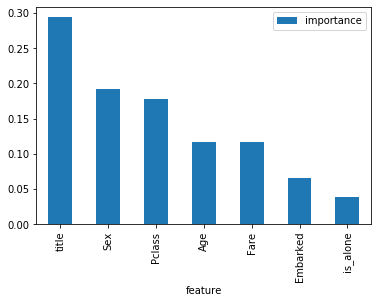

In [136]:
# plotting the importances of each feature
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

It seems that is_alone doesnt help much, let see what happens if we remove it

In [131]:
df1_train = X_train.drop("is_alone", axis=1)
df1_test = X_test.drop("is_alone",axis=1)


In [144]:
rf1 = RandomForestClassifier(n_estimators=100,oob_score=True)
rf1.fit(df1_train,Y_train)

acc_rf1 = round(rf1.score(df1_train,Y_train)*100,2)
print(acc_rf1)

86.42


Hence, is_alone feature is important

## Hyperparameter Tuning

In [155]:
param_grid = {'criterion':["gini","entropy"],\
              "min_samples_leaf":[1,5,10,25,50,70],\
             "min_samples_split":[2,4,10,12,16,18,25,35],\
             "n_estimators":[100,400,700,1000,1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf2 = RandomForestClassifier(n_estimators=100, max_features='auto',\
        oob_score=True, random_state=1,n_jobs=-1)

clf = GridSearchCV(estimator=rf,param_grid=param_grid,\
      n_jobs=-1)

clf.fit(X_train, Y_train)
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 25,
 'n_estimators': 100}

In [156]:
random_forest = RandomForestClassifier(criterion='entropy',\
                min_samples_leaf=1,min_samples_split=25,\
                n_estimators=100,max_features='auto',oob_score=True,\
                random_state=1,n_jobs=-1)

random_forest.fit(X_train,Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train,Y_train)
print("oob score:",round(random_forest.oob_score_,4)*100,'%')

oob score: 81.37 %


In [154]:
output2 = pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived':Y_prediction})
output.to_csv('my_submission2.csv',index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
